In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split

X,y = load_breast_cancer(return_X_y = True)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
print(X_train, y_train, X_test, y_test, sep = "\n")

[[1.317e+01 1.822e+01 8.428e+01 ... 1.045e-01 2.235e-01 6.925e-02]
 [1.219e+01 1.329e+01 7.908e+01 ... 8.187e-02 3.469e-01 9.241e-02]
 [1.549e+01 1.997e+01 1.024e+02 ... 2.121e-01 3.187e-01 1.019e-01]
 ...
 [1.227e+01 1.792e+01 7.841e+01 ... 9.532e-02 3.455e-01 6.896e-02]
 [1.458e+01 1.366e+01 9.429e+01 ... 9.186e-02 2.626e-01 7.048e-02]
 [1.385e+01 1.518e+01 8.899e+01 ... 9.993e-02 2.955e-01 6.912e-02]]
[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0
 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 

In [3]:
mu0, mu1 = np.zeros((1,30)), np.zeros((1,30))
N0, N1 = 0, 0

for idx, target in enumerate(y_train):
    if target == 0:
        mu0 += X_train[idx]
        N0 += 1
    elif target == 1:
        mu1 += X_train[idx]
        N1 += 1

mu0, mu1 = mu0/N0, mu1/N1
print(mu0, mu1,np.shape(mu0), np.shape(mu1), sep = "\n")

[[1.71976974e+01 2.14532237e+01 1.13562961e+02 9.43696711e+02
  1.03112039e-01 1.45330461e-01 1.58328224e-01 8.65759211e-02
  1.93901316e-01 6.30429605e-02 5.68388158e-01 1.18876645e+00
  4.02008553e+00 6.50110526e+01 6.68851974e-03 3.16590658e-02
  4.14399342e-02 1.49530395e-02 2.04921513e-02 4.05867763e-03
  2.07625658e+01 2.92290789e+01 1.38487105e+02 1.36379013e+03
  1.45990921e-01 3.74131316e-01 4.53775000e-01 1.81762303e-01
  3.27821711e-01 9.24516447e-02]]
[[1.21481098e+01 1.78992276e+01 7.80649187e+01 4.61873984e+02
  9.19939024e-02 7.90228862e-02 4.46033280e-02 2.50867073e-02
  1.73312195e-01 6.25199593e-02 2.81571545e-01 1.19519390e+00
  1.98619919e+00 2.09688821e+01 7.05709350e-03 2.12023902e-02
  2.50984130e-02 9.63289024e-03 2.05987764e-02 3.51940732e-03
  1.33823821e+01 2.34897967e+01 8.69607317e+01 5.57530081e+02
  1.24301423e-01 1.82257724e-01 1.64846691e-01 7.29460976e-02
  2.70628049e-01 7.89753659e-02]]
(1, 30)
(1, 30)


In [4]:
Swithin = np.zeros((30,30))
for idx, target in enumerate(y_train):
    if target == 0:
        distanceFromMean = (X_train[idx] - mu0)
        Swithin += np.matmul(np.transpose(distanceFromMean), distanceFromMean) 
    elif target == 1:
        distanceFromMean = (X_train[idx] - mu1)
        Swithin += np.matmul(np.transpose(distanceFromMean), distanceFromMean)

print(np.shape(Swithin), Swithin, sep = "\n")

(30, 30)
[[ 2.01891767e+03 -1.81917209e+01  1.35631175e+04  1.97316224e+05
  -1.71515651e+00  4.24668206e+00  1.56461180e+01  1.22723282e+01
  -2.07750227e+00 -2.55329165e+00  7.26776470e+01 -6.37866804e+01
   5.27625986e+02  1.41844091e+04 -8.25449903e-01 -5.19284709e-01
   9.09385920e-02  6.37976026e-01 -9.17475816e-01 -2.85946702e-01
   2.39654364e+03 -5.28139607e+02  1.61842107e+04  2.78566878e+05
  -6.17530752e+00 -7.57156220e+00  1.05329839e+01  1.30203823e+01
  -8.65677236e+00 -5.47400223e+00]
 [-1.81917209e+01  5.83926067e+03 -9.35141611e+00  4.60566767e+03
  -3.48978626e+00  3.08430423e-01  4.82095577e+00 -1.23576315e+00
  -1.98812033e+00 -9.63872584e-02  4.07177740e+00  3.59538072e+02
   7.02858019e+01 -3.81612358e+02  2.60601923e-01  2.79176707e+00
   3.79987417e+00  1.92472110e-01  6.91450073e-01  3.13193631e-01
  -5.87101446e+01  7.16032881e+03 -1.83312943e+02 -3.09724145e+03
  -3.08436208e+00  1.08449737e+01  1.83752971e+01 -2.01076087e+00
  -5.02216131e+00  8.17312214e-0

In [5]:
w = np.matmul(np.linalg.inv(Swithin), (np.transpose(mu1) - np.transpose(mu0)))

In [6]:
print(np.shape(w), w, sep = "\n")

(30, 1)
[[ 7.57709039e-03]
 [ 2.20586743e-04]
 [ 1.94789883e-04]
 [-6.05618666e-05]
 [-5.46168797e-02]
 [ 1.25550180e-01]
 [-9.10165916e-02]
 [-2.91614601e-02]
 [-3.35086071e-02]
 [ 3.42382339e-01]
 [ 2.80821906e-02]
 [ 2.26351765e-03]
 [ 4.12203863e-04]
 [-3.20135249e-04]
 [-1.33278728e+00]
 [-2.25213711e-02]
 [ 1.62973093e-01]
 [-3.22081422e-01]
 [-3.33478565e-01]
 [ 5.92116146e-01]
 [-1.55719300e-02]
 [-8.03986213e-04]
 [ 5.30147240e-05]
 [ 1.00405563e-04]
 [ 9.25157434e-03]
 [ 1.05594103e-02]
 [-1.03287043e-02]
 [-7.44542771e-02]
 [ 1.77885689e-02]
 [-3.15915306e-01]]


In [7]:
import matplotlib.pyplot as plt

In [8]:
z0, z1 = [], []
for idx, target in enumerate(y_train):
    if target == 0:
        z0 += [np.dot(np.transpose(w), X_train[idx])[0]]
    elif target == 1:
        z1 += [np.dot(np.transpose(w), X_train[idx])[0]]
        
print(z0, z1, sep = "\n")

[-0.15499973623777952, -0.14464474532087823, -0.14205425942635386, -0.15483371746165311, -0.13204590403683603, -0.15303046608837262, -0.14684413580313663, -0.1367367903691711, -0.1386632560909772, -0.15200716436738526, -0.11598870546671533, -0.14039509679295592, -0.15975197013425396, -0.15006259332880115, -0.1431976630945731, -0.131235190696259, -0.12980495496033337, -0.1294489375428412, -0.13964070781707844, -0.1419639844602722, -0.15347041674136963, -0.1563334479467206, -0.13662178873080166, -0.14228800970704836, -0.1263324446594835, -0.14910166362149813, -0.136943151101929, -0.1206672569179989, -0.13863457972858026, -0.1464080117545271, -0.11732100029895033, -0.13853980234299235, -0.12131034075483002, -0.15415833919156957, -0.12291504811443293, -0.16308475583073545, -0.13916879064790305, -0.1449322354706546, -0.13092911645550998, -0.14769037826608322, -0.14060348276614465, -0.13776682408527083, -0.141728633511011, -0.13113426854869187, -0.14656159130932556, -0.11962853909843062, -0.

(array([ 1.,  3., 10., 37., 44., 56., 51., 26., 14.,  4.]),
 array([-0.12833131, -0.12332999, -0.11832867, -0.11332735, -0.10832604,
        -0.10332472, -0.0983234 , -0.09332208, -0.08832076, -0.08331944,
        -0.07831812]),
 <a list of 10 Patch objects>)

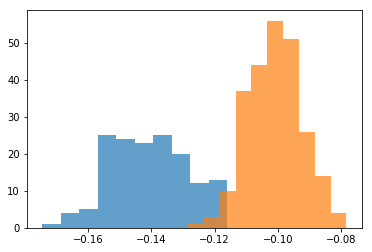

In [9]:
plt.hist(z0, alpha = 0.7)
plt.hist(z1, alpha = 0.7)

In [13]:
threshold = -0.12
z, prediction = [], []
for idx, testVector in enumerate(X_test):
    zi = np.dot(np.transpose(w), testVector)[0]
    if zi < threshold:
        predictionI = 0
    else:
        predictionI = 1
    prediction += [predictionI]
    z += [zi]
    
print(z, prediction, sep = "\n")        

[-0.09589972045493962, -0.0989146577316933, -0.13625802970661757, -0.14069574353668995, -0.10173322296641249, -0.09802144309824641, -0.08806382461004222, -0.09581635545548384, -0.11093912601271194, -0.15549978730767708, -0.10288985594376245, -0.09417965811097051, -0.08285678117496449, -0.09050733021520233, -0.11157063920271344, -0.09154678981535266, -0.10980872871476356, -0.1563830504124104, -0.09008713791810405, -0.10320623377767804, -0.10761953398967788, -0.14542890970212802, -0.14427519853699047, -0.14753463265284955, -0.11180334257282695, -0.07416341388340318, -0.09949622550269585, -0.1036815634030456, -0.10388604565914614, -0.1308858211125647, -0.14073953346594079, -0.0925203888724584, -0.14222391788132044, -0.10631141801973036, -0.13816746073789835, -0.09487827496683499, -0.09137389013327535, -0.09965479413420537, -0.13566499404927704, -0.12661270918118886, -0.15386417347940337, -0.14713031385034767, -0.1179557853346814, -0.11358472828890709, -0.10903124906646447, -0.087093819225

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test)

0.9766081871345029

In [15]:
sum(abs(np.array(prediction) - y_test)) / len(prediction)

0.023391812865497075